## Выпускная квалификационная работа

Выполнил: студент группы АД-803 Пушкин А.Е.

2022 г.

# Задание для итоговой работы

**Анализ данных о покупках** 

* Шаг 1. Импорт библиотек 
* Шаг 2. Загрузка данных из файлов (customers.csv, transactions.csv, product.csv)
* Шаг 3. Очистка данных
    1. Проверить соответствие типов данных, выполнить преобразование типов данных при необходимости
    1. Проверить на пропуски, заполнить пропуски при необходимости 
    1. Проверить данные на наличие дубликатов в датасетах *customers* и *product*
    1. Выполнить поиск аномалий в данных, построить диаграмму размаха по признаку возраст покупателя, выполнить удаление выбросов при необходимости
* Шаг 4. Разведочный (исследовательский) анализ данных
    1. Определить сколько товаров продавалось в разные месяцы, построить график плотности
    1. Определить список товаров ТОП-10 с максимальной выручкой за все время, построить столбчатую диаграмму
    1. Определить список популярных товаров ТОП-10 за все время, построить столбчатую диаграмму
    1. Определить долю товаров, которые были проданы один раз, построить круговую диаграмму
    1. Определить какая возрастная группа покупает больше товаров, группы формировать с шагом 10 лет, построить столбчатую диаграмму и график плотности распределения
    1. Определить покупают ли больше товаров те, кто активно следит за новостями о моде, построить стобчатую диаграмму
* Шаг 5. Анализ взаимосвязи признаков
    1. Проверить гипотезу о данных - влияет ли статус членства клуба на количество купленных товаров, найти p-value, сформулировать вывод
* Шаг 6. Кластеризация по покупателем
    1. Сформировать датасет с признаками *покупатель, количество купленных товаров, возраст, итоговая потраченная сумма, членство в клубе, частота просмотра новостей*
    1. Найти оптимальное количество кластеров по покупателям
    1. Построить модель кластеризации данных
    1. Визуализировать кластеры с помощью диаграммы рассеивания, выбрать подходящие признаки для диаграммы
* Шаг 7. Построение рекомендательной системы 
    1. Сформировать датасет с признаками *покупатель, товар, количество купленных товаров*
    1. Выполнить коллаборативную фильтрацию по схожести покупателей
    1. Вывести в качестве рекомендаций список наименований товаров для пользователя с ИД = 6510
    

Исходные файлы для анализа:

https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/transactions.csv?raw=true

https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/customers.csv?raw=true

https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/product.csv?raw=true



### Описание датасета
#### customers.csv

Признак | Описание
--:|:--
club_member | Статус члена клуба магазина
fashion_news | Часто ли смотрит новости о моде
age | Возраст
customer_id | Уникальный идентификатор покупателя


#### transactions.csv
Признак | Описание
--:|:--
t_dat | Дата
article_id | Уникальный идентификатор товара
price | Цена товара
customer_id | Уникальный идентификатор покупателя


#### product.csv
Признак | Описание
--:|:--
article_id | Уникальный идентификатор товара
product_name | Наименование товара
colour | Цвет товара

## Раздел 1 - Предварительный анализ наборов данных, очистка данных

<div class="alert alert-block alert-warning">
<b>Импорт библиотек</b>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

<div class="alert alert-block alert-warning">
<b>Создание переменных, содержащих ссылки на наборы данных (датасеты)</b>
</div>

In [2]:
transactions_data = 'https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/transactions.csv?raw=true'
customers_data = 'https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/customers.csv?raw=true'
product_data = 'https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/product.csv?raw=true'

<div class="alert alert-block alert-success">
<b>Библиотеки загружены успешно, переменные со ссылками на наборы данных созданы</b>
</div>

<div class="alert alert-block alert-warning">
<b>Загрузка данных из датасетов, оценка правильности загрузки данных, размерности, типов данных в наборах данных, очистка данных</b>
</div>

#### -- Набор данных `1` --

<div class="alert alert-block alert-warning">
<b>Загрузка данных в переменную с преобразованием в табличный вид для дальнейшей работы</b>
</div>

In [3]:
df_transactions = pd.read_csv(transactions_data, index_col='Unnamed: 0')

<div class="alert alert-block alert-warning">
<b>Вывод на экран части полученного набора данных</b>
</div>

In [4]:
df_transactions

,t_dat,article_id,price,customer_id
0,2020-04-13,706016003,33.88,0
1,2018-09-21,493810014,19.05,1
2,2018-10-04,594541012,16.93,2
3,2018-12-11,719712001,36.00,3
4,2019-04-08,700737007,25.41,4
...,...,...,...,...
317879,2019-01-20,589924010,10.15,229802
317880,2019-04-30,706268029,3.39,205253
317881,2019-07-03,554792001,25.41,100940
317882,2020-02-20,243937028,16.93,162847


<div class="alert alert-block alert-warning">
<b>Определение размера датасета, типа данных по каждому признаку</b>
</div>

In [5]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317884 entries, 0 to 317883
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   t_dat        317884 non-null  object 
 1   article_id   317884 non-null  int64  
 2   price        317884 non-null  float64
 3   customer_id  317884 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.1+ MB


<div class="alert alert-block alert-warning">
<b>Уточнение отсутствия нулевых значений</b>
</div>

In [6]:
df_transactions.isnull().sum()

t_dat          0
article_id     0
price          0
customer_id    0
dtype: int64

In [7]:
df_transactions.isna().sum()

t_dat          0
article_id     0
price          0
customer_id    0
dtype: int64

<div class="alert alert-block alert-success">
<b>Набор данных df_transactions состоит из 317 884 записей и 4 признаков. Нулевых значений не обнаруживается ни в одном признаке</b>
</div>

<div class="alert alert-block alert-warning">
<b>Определение аномалий для последующей проверки</b>
</div>

In [8]:
df_transactions.describe(include='all')

,t_dat,article_id,price,customer_id
count,317884,3.178840e+05,317884.000000,317884.000000
unique,734,NaN,NaN,NaN
top,2019-09-28,NaN,NaN,NaN
freq,1995,NaN,NaN,NaN
mean,NaN,6.957393e+08,27.834441,102987.763804
std,NaN,1.338297e+08,19.230723,65772.091377
min,NaN,1.087750e+08,0.190000,0.000000
25%,NaN,6.315360e+08,15.800000,45332.000000
50%,NaN,7.139971e+08,25.410000,97248.500000
75%,NaN,7.863680e+08,33.880000,157616.250000


<div class="alert alert-block alert-success">
<b>Признак price будет проверен на наличие выбросов, т.к. максимальное значение отличается на порядок от среднего значения и значения 75 процентиля</b>
</div>

<div class="alert alert-block alert-warning">
<b>Вывод уникальных значений категориальных признаков</b>
</div>

In [9]:
raw_list_transactions = []
for col in df_transactions.columns:
    if df_transactions[col].dtype == 'object':
        raw_list_transactions.append([f'{col}, уник. значений: {df_transactions[col].nunique()}', df_transactions[col].unique()])
        raw_list_transactions.append('----------')
raw_list_transactions

[['t_dat, уник. значений: 734',
  array(['2020-04-13', '2018-09-21', '2018-10-04', '2018-12-11',
         '2019-04-08', '2019-03-31', '2019-01-28', '2019-10-06',
         '2020-07-04', '2020-03-31', '2018-10-23', '2019-02-26',
         '2020-09-03', '2018-10-29', '2020-07-11', '2020-09-17',
         '2019-06-19', '2019-07-09', '2019-07-01', '2019-02-27',
         '2018-10-07', '2019-01-06', '2020-03-02', '2020-01-02',
         '2020-08-23', '2018-11-13', '2020-05-19', '2020-07-17',
         '2019-08-30', '2018-10-12', '2019-09-30', '2019-05-27',
         '2019-02-23', '2020-09-12', '2020-01-23', '2019-02-17',
         '2019-05-31', '2020-04-11', '2019-02-01', '2018-12-21',
         '2019-05-25', '2019-04-15', '2019-06-09', '2019-06-29',
         '2019-05-11', '2020-05-20', '2020-09-20', '2019-08-18',
         '2019-05-22', '2020-05-21', '2019-03-26', '2020-04-09',
         '2019-05-23', '2019-07-25', '2020-05-18', '2019-02-22',
         '2019-07-31', '2020-07-24', '2019-05-30', '2020-0

<div class="alert alert-block alert-warning">
<b>Преобразование типа признака t_dat на datetime</b>
</div>

<div class="alert alert-block alert-danger">
Перед преобразованием типа и очисткой данных передадим исходный датасет в переменную df_transactions_cleaned
</div>

In [10]:
df_transactions_cleaned = df_transactions

In [11]:
df_transactions_cleaned['t_dat']= pd.to_datetime(df_transactions_cleaned['t_dat'])

<div class="alert alert-block alert-warning">
<b>Проверка результата преобразования типа</b>
</div>

In [12]:
df_transactions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317884 entries, 0 to 317883
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   t_dat        317884 non-null  datetime64[ns]
 1   article_id   317884 non-null  int64         
 2   price        317884 non-null  float64       
 3   customer_id  317884 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 12.1 MB


<div class="alert alert-block alert-success">
<b>Тип данных преобразован успешно</b>
</div>

<div class="alert alert-block alert-warning">
<b>Оценка и удаление выбросов признака price</b>
</div>

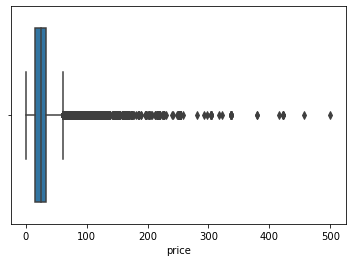

In [13]:
sns.boxplot(x= df_transactions_cleaned['price']);

<AxesSubplot:title={'center':'price'}, ylabel='Frequency'>

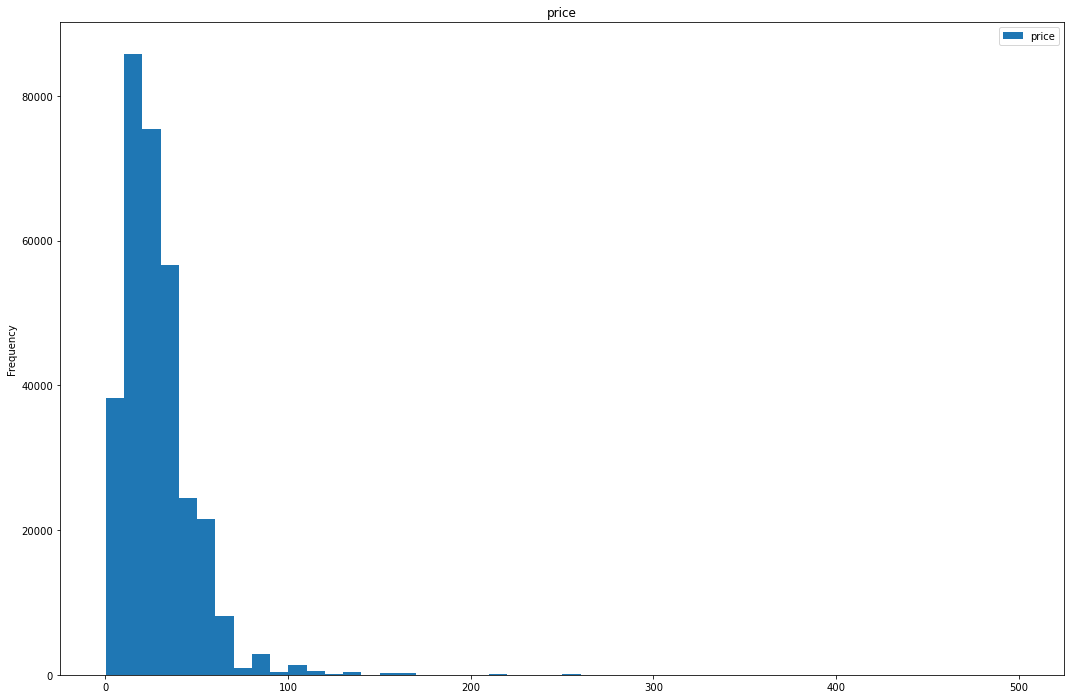

In [14]:
df_transactions_cleaned.plot(y='price', title='price', kind='hist', bins=50, figsize=(18,12))

<div class="alert alert-block alert-success">
<b>Из графиков видно, что распределение сильно вытянуто вправо. Это может говорить о том, что цена товара выше 120 единиц является редкостью или ошибкой ввода данных. Для дальнейшего анализа датасет будет очищен от записей, у которых значение признака price выше 120 единиц</b>
</div>

In [15]:
df_transactions_cleaned.drop(df_transactions_cleaned[df_transactions_cleaned['price'] > 120].index, inplace=True)

<div class="alert alert-block alert-warning">
<b>Визуальная и статистическая оценка результата удаления данных</b>
</div>

<AxesSubplot:title={'center':'price'}, ylabel='Frequency'>

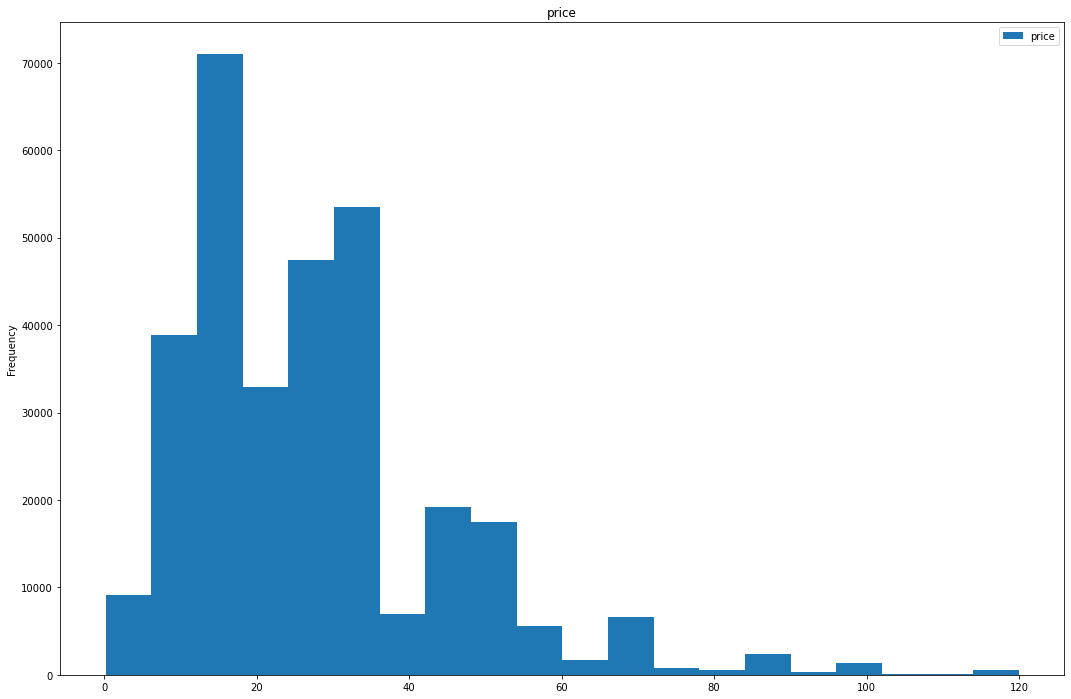

In [16]:
df_transactions_cleaned.plot(y='price', title='price', kind='hist', bins=20, figsize=(18,12))

In [17]:
df_transactions_cleaned.describe(include='all', datetime_is_numeric=True)

,t_dat,article_id,price,customer_id
count,316614,3.166140e+05,316614.000000,316614.000000
mean,2019-09-16 02:26:05.691978240,6.956116e+08,27.279964,102999.717770
min,2018-09-20 00:00:00,1.087750e+08,0.190000,0.000000
25%,2019-03-29 00:00:00,6.314180e+08,15.630000,45367.250000
50%,2019-08-24 00:00:00,7.139950e+08,25.410000,97256.500000
75%,2020-03-30 00:00:00,7.863070e+08,33.880000,157626.750000
max,2020-09-22 00:00:00,9.534500e+08,119.970000,229803.000000
std,NaN,1.339468e+08,16.898452,65766.238247


<div class="alert alert-block alert-success">
<b>Датасет очищен успешно, о чем говорит изменившееся значение максимального значения признака price и общее количество записей</b>
</div>

#### -- Набор данных `2` --

<div class="alert alert-block alert-warning">
<b>Загрузка данных в переменную с преобразованием в табличный вид для дальнейшей работы</b>
</div>

In [18]:
df_customers = pd.read_csv(customers_data, index_col='Unnamed: 0')

<div class="alert alert-block alert-warning">
<b>Вывод на экран части полученного набора данных</b>
</div>

In [19]:
df_customers

,club_member,fashion_news,age,customer_id
0,ACTIVE,NONE,49.0,91991
1,ACTIVE,Regularly,32.0,164401
2,ACTIVE,Regularly,56.0,182738
3,ACTIVE,Regularly,30.0,166422
4,PRE-CREATE,Regularly,40.0,164557
...,...,...,...,...
229799,ACTIVE,Regularly,44.0,96272
229800,ACTIVE,NONE,27.0,14468
229801,ACTIVE,NONE,27.0,76150
229802,ACTIVE,NONE,40.0,94386


<div class="alert alert-block alert-warning">
<b>Определение размера датасета, типа данных по каждому признаку</b>
</div>

In [20]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229804 entries, 0 to 229803
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   club_member   229343 non-null  object 
 1   fashion_news  228565 non-null  object 
 2   age           228613 non-null  float64
 3   customer_id   229804 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.8+ MB


<div class="alert alert-block alert-success">
<b>Набор данных df_customers состоит из 229 804 записей и 4 признаков. Нулевые значения обнаружены в трех признаках</b>
</div>

<div class="alert alert-block alert-warning">
<b>Определение аномалий для последующей проверки</b>
</div>

In [21]:
df_customers.describe(include='all')

,club_member,fashion_news,age,customer_id
count,229343,228565,228613.000000,229804.000000
unique,3,3,NaN,NaN
top,ACTIVE,NONE,NaN,NaN
freq,223275,133950,NaN,NaN
mean,NaN,NaN,35.987402,114901.500000
std,NaN,NaN,13.195025,66338.844968
min,NaN,NaN,16.000000,0.000000
25%,NaN,NaN,25.000000,57450.750000
50%,NaN,NaN,31.000000,114901.500000
75%,NaN,NaN,48.000000,172352.250000


<div class="alert alert-block alert-warning">
<b>Уточнение наличия нулевых значений</b>
</div>

In [22]:
df_customers.isnull().sum()

club_member      461
fashion_news    1239
age             1191
customer_id        0
dtype: int64

In [23]:
df_customers.isna().sum()

club_member      461
fashion_news    1239
age             1191
customer_id        0
dtype: int64

In [24]:
df_customers.isnull().mean()*100

club_member     0.200606
fashion_news    0.539155
age             0.518268
customer_id     0.000000
dtype: float64

<div class="alert alert-block alert-success">
<b>Нулевых значений в датасете df_customers суммарно не более 1,5%. В связи малым количеством нулевые значения будут удалены</b>
</div>

<div class="alert alert-block alert-warning">
<b>Удаление нулевых значений, проверка результата удаления</b>
</div>

<div class="alert alert-block alert-danger">
Перед очисткой данных передадим исходный датасет в переменную df_customers_cleaned
</div>

In [25]:
df_customers_cleaned = df_customers.dropna()
df_customers_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227155 entries, 0 to 229803
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   club_member   227155 non-null  object 
 1   fashion_news  227155 non-null  object 
 2   age           227155 non-null  float64
 3   customer_id   227155 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.7+ MB


In [26]:
df_customers_cleaned.isnull().mean()*100

club_member     0.0
fashion_news    0.0
age             0.0
customer_id     0.0
dtype: float64

<div class="alert alert-block alert-success">
<b>Нулевые значения удалены успешно</b>
</div>

<div class="alert alert-block alert-warning">
<b>Проверка на наличие дубликатов</b>
</div>

In [27]:
df_customers_cleaned.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Дубликатов нет в наборе df_customers_cleaned</b>
</div>

<div class="alert alert-block alert-warning">
<b>Вывод уникальных значений категориальных признаков</b>
</div>

In [28]:
raw_list_customers = []
for col in df_customers_cleaned.columns:
    if df_customers_cleaned[col].dtype == 'object':
        raw_list_customers.append([f'{col}, уник. значений: {df_customers_cleaned[col].nunique()}', df_customers_cleaned[col].unique()])
        raw_list_customers.append('----------')
raw_list_customers

[['club_member, уник. значений: 3',
  array(['ACTIVE', 'PRE-CREATE', 'LEFT CLUB'], dtype=object)],
 '----------',
 ['fashion_news, уник. значений: 3',
  array(['NONE', 'Regularly', 'Monthly'], dtype=object)],
 '----------']

<div class="alert alert-block alert-success">
<b>Уникальные значения вопросов не вызывают</b>
</div>

<div class="alert alert-block alert-warning">
<b>Оценка и удаление выбросов признака age</b>
</div>

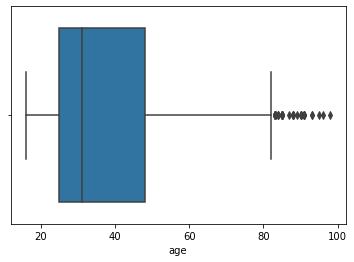

In [29]:
sns.boxplot(x= df_customers_cleaned['age']);

<div class="alert alert-block alert-success">
<b>Из графика видно, что есть выбросы данных. Средняя продолжительность в мире не превышает 80 лет, поэтому такие выбросы могут быть удалены. Для дальнейшего анализа датасет будет очищен от записей, у которых значение признака age выше 82 лет</b>
</div>

In [30]:
df_customers_cleaned.drop(df_customers_cleaned[df_customers_cleaned['age'] > 82].index, inplace=True)

C:\Users\PUSHKINY\AppData\Local\Temp\ipykernel_13524\1365347936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers_cleaned.drop(df_customers_cleaned[df_customers_cleaned['age'] > 82].index, inplace=True)


<div class="alert alert-block alert-warning">
<b>Визуальная и статистическая оценка результата удаления данных</b>
</div>

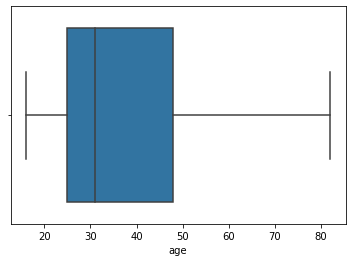

In [31]:
sns.boxplot(x= df_customers_cleaned['age']);

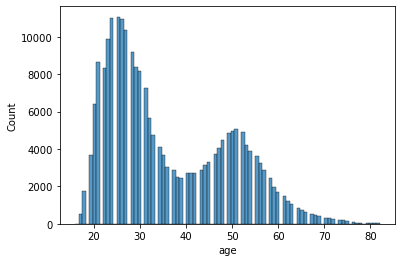

In [32]:
sns.histplot(x = df_customers_cleaned['age'], data = df_customers_cleaned, legend = False);

In [33]:
df_customers_cleaned.describe(include='all')

,club_member,fashion_news,age,customer_id
count,227111,227111,227111.000000,227111.00000
unique,3,3,NaN,NaN
top,ACTIVE,NONE,NaN,NaN
freq,221532,132722,NaN,NaN
mean,NaN,NaN,35.973925,114858.39700
std,NaN,NaN,13.177406,66338.45391
min,NaN,NaN,16.000000,1.00000
25%,NaN,NaN,25.000000,57402.50000
50%,NaN,NaN,31.000000,114840.00000
75%,NaN,NaN,48.000000,172290.50000


<div class="alert alert-block alert-success">
<b>Датасет очищен успешно, о чем говорит изменившееся значение максимального значения признака price и общее количество записей</b>
</div>

#### -- Набор данных `3` --

<div class="alert alert-block alert-warning">
<b>Загрузка данных в переменную с преобразованием в табличный вид для дальнейшей работы</b>
</div>

In [34]:
df_product = pd.read_csv(product_data, index_col='Unnamed: 0')

<div class="alert alert-block alert-warning">
<b>Вывод на экран части полученного набора данных</b>
</div>

In [35]:
df_product

,article_id,product_name,color
0,108775015,Vest top,Black
1,108775044,Vest top,White
2,110065001,Bra,Black
3,110065002,Bra,White
4,110065011,Bra,Light Beige
...,...,...,...
53621,947934001,Underwear Tights,Black
53622,949198001,Trousers,Black
53623,949551002,Sweater,Pink
53624,952267001,Underwear Tights,Black


<div class="alert alert-block alert-warning">
<b>Определение размера датасета, типа данных по каждому признаку</b>
</div>

In [36]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53626 entries, 0 to 53625
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_id    53626 non-null  int64 
 1   product_name  53626 non-null  object
 2   color         53626 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


<div class="alert alert-block alert-warning">
<b>Уточнение наличия нулевых значений</b>
</div>

In [37]:
df_product.isnull().sum()

article_id      0
product_name    0
color           0
dtype: int64

In [38]:
df_product.isna().sum()

article_id      0
product_name    0
color           0
dtype: int64

<div class="alert alert-block alert-success">
<b>Набор данных df_product состоит из 53 626 записей и 3 признаков. Нулевые значения не обнаружены ни в одном признаке</b>
</div>

In [39]:
df_product.describe(include='all')

,article_id,product_name,color
count,5.362600e+04,53626,53626
unique,NaN,118,50
top,NaN,Dress,Black
freq,NaN,6057,13758
mean,7.088432e+08,NaN,NaN
std,1.231297e+08,NaN,NaN
min,1.087750e+08,NaN,NaN
25%,6.375150e+08,NaN,NaN
50%,7.154180e+08,NaN,NaN
75%,7.989720e+08,NaN,NaN


<div class="alert alert-block alert-warning">
<b>Проверка на наличие дубликатов</b>
</div>

In [40]:
df_product.duplicated().sum()

0

<div class="alert alert-block alert-warning">
<b>Дубликатов нет в наборе df_product</b>
</div>

<div class="alert alert-block alert-warning">
<b>Вывод уникальных значений категориальных признаков</b>
</div>

In [41]:
raw_list_product = []
for col in df_product.columns:
    if df_product[col].dtype == 'object':
        raw_list_product.append([f'{col}, уник. значений: {df_product[col].nunique()}', df_product[col].unique()])
        raw_list_product.append('----------')
raw_list_product

[['product_name, уник. значений: 118',
  array(['Vest top', 'Bra', 'Underwear Tights', 'Leggings/Tights',
         'Trousers', 'Hair clip', 'Umbrella', 'Sweater', 'Bodysuit',
         'Hair string', 'Socks', 'Unknown', 'Top',
         'Pyjama jumpsuit/playsuit', 'Hoodie', 'Hair/alice band', 'Belt',
         'Bikini top', 'Underwear bottom', 'Swimsuit', 'Skirt',
         'Hat/beanie', 'Kids Underwear top', 'Shorts', 'T-shirt',
         'Cap/peaked', 'Pyjama set', 'Sneakers', 'Dress', 'Sunglasses',
         'Cardigan', 'Gloves', 'Earring', 'Blazer', 'Swimwear bottom',
         'Jacket', 'Shirt', 'Costumes', 'Robe', 'Scarf', 'Coat',
         'Other accessories', 'Polo shirt', 'Slippers', 'Night gown',
         'Alice band', 'Straw hat', 'Tailored Waistcoat', 'Ballerinas',
         'Tie', 'Necklace', 'Pyjama bottom', 'Felt hat', 'Bag', 'Bracelet',
         'Boots', 'Blouse', 'Watch', 'Beanie', 'Hat/brim', 'Dungarees',
         'Other shoe', 'Swimwear set', 'Underwear body', 'Swimwear top',

<div class="alert alert-block alert-success">
<b>Обнаружены уникальные значения Unknown. Значение Unknown в признаке product_name останется без изменений, а в признаке color будет заменено на также существующее значение Other</b>
</div>

In [42]:
df_product['product_name'][df_product['product_name'] == 'Unknown'].count()

83

In [43]:
df_product.color[df_product.color == 'Unknown'].count()

20

<div class="alert alert-block alert-warning">
<b>Замена цвета изделия Unknown на другую категорию Other</b>
</div>

In [44]:
df_product.color = df_product.color.replace({'Unknown': 'Other'})

In [45]:
df_product.color[df_product.color == 'Unknown'].count()

0

<div class="alert alert-block alert-success">
<b>Замена Unknown в признаке color произошла успешно</b>
</div>

## Выводы раздела 1

$\blacktriangleright$ Загружены данные из сторонных источников, преобразованы в табличный вид для дальнейшей работы

$\blacktriangleright$ Произведена очистка данных

### ----------

## Раздел 2 - Разведочный анализ данных

* Шаг 4. Разведочный (исследовательский) анализ данных
    1. Определить сколько товаров продавалось в разные месяцы, построить график плотности
    1. Определить список товаров ТОП-10 с максимальной выручкой за все время, построить столбчатую диаграмму
    1. Определить список популярных товаров ТОП-10 за все время, построить столбчатую диаграмму
    1. Определить долю товаров, которые были проданы один раз, построить круговую диаграмму
    1. Определить какая возрастная группа покупает больше товаров, группы формировать с шагом 10 лет, построить столбчатую диаграмму и график плотности распределения
    1. Определить покупают ли больше товаров те, кто активно следит за новостями о моде, построить стобчатую диаграмму

<div class="alert alert-block alert-warning">
<b>4.1 Определение количества товаров, проданных в каждый месяц, построение графика плотности</b>
</div>

<div class="alert alert-block alert-warning">
<b>Создание функции определения месяца с последующим применением к датасету и оценкой правильности выделения месяца</b>
</div>

In [46]:
def to_month(line):
    return line.month

In [47]:
df_transactions_cleaned['month'] = df_transactions_cleaned['t_dat'].apply(to_month,1)
df_transactions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316614 entries, 0 to 317883
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   t_dat        316614 non-null  datetime64[ns]
 1   article_id   316614 non-null  int64         
 2   price        316614 non-null  float64       
 3   customer_id  316614 non-null  int64         
 4   month        316614 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 14.5 MB


In [48]:
df_transactions_cleaned

,t_dat,article_id,price,customer_id,month
0,2020-04-13,706016003,33.88,0,4
1,2018-09-21,493810014,19.05,1,9
2,2018-10-04,594541012,16.93,2,10
3,2018-12-11,719712001,36.00,3,12
4,2019-04-08,700737007,25.41,4,4
...,...,...,...,...,...
317879,2019-01-20,589924010,10.15,229802,1
317880,2019-04-30,706268029,3.39,205253,4
317881,2019-07-03,554792001,25.41,100940,7
317882,2020-02-20,243937028,16.93,162847,2


<div class="alert alert-block alert-success">
<b>Выделение месяца из даты прошло успешно</b>
</div>

<div class="alert alert-block alert-warning">
<b>Подсчет количества проданных товаров в каждый месяц</b>
</div>

In [49]:
df_monthly_orders = df_transactions_cleaned.groupby(['month']).count()['article_id'].reset_index()
df_monthly_orders

,month,article_id
0,1,23100
1,2,21623
2,3,23212
3,4,28170
4,5,29339
5,6,36818
6,7,31679
7,8,24771
8,9,25910
9,10,25192


<div class="alert alert-block alert-warning">
<b>Построение графика плотности</b>
</div>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


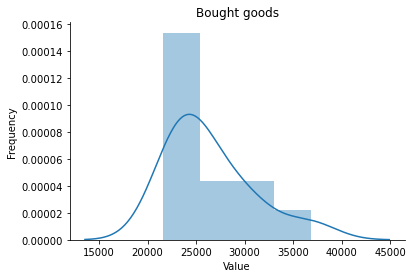

In [50]:
qnty_montly = sns.distplot(df_monthly_orders['article_id']);

qnty_montly.set(xlabel = 'Value', ylabel = 'Frequency', title = "Bought goods")

sns.despine()

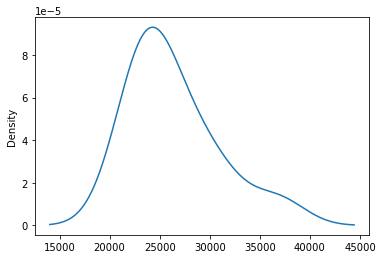

In [51]:
df_monthly_orders['article_id'].plot(kind='density');

<div class="alert alert-block alert-success">
<b>Диаграмма плотности построена</b>
</div>

<div class="alert alert-block alert-warning">
<b>4.2 Выделение ТОП-10 товаров с максимальной выручкой, построение столбчатой диаграммы</b>
</div>

In [52]:
df_transactions_cleaned.article_id.nunique()

53180

In [53]:
df_product.article_id.nunique()

53626

In [54]:
TOP_products_price = df_transactions_cleaned.groupby(['article_id']).sum()['price'].reset_index().sort_values(['price'], ascending= False)
TOP_products_price_with_names = TOP_products_price.merge(right= df_product, right_on='article_id', left_on= 'article_id')
TOP_products_price_with_names[:10]

,article_id,price,product_name,color
0,706016001,16364.05,Trousers,Black
1,706016002,11309.68,Trousers,Light Blue
2,568601006,9659.58,Blazer,Black
3,448509014,7720.95,Trousers,Blue
4,706016003,7001.72,Trousers,Dark Blue
5,562245046,6886.59,Trousers,Black
6,399223001,6772.23,Trousers,Black
7,720125001,6312.63,Leggings/Tights,Black
8,562245001,5761.51,Trousers,Black
9,751471001,5630.73,Trousers,Black


<div class="alert alert-block alert-warning">
<b>Построение столбчатой диаграммы</b>
</div>

Text(0, 0.5, 'price')

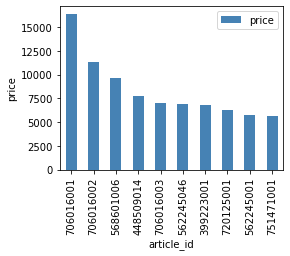

In [55]:
fig = plt.figure(figsize=(4, 3))
ax = fig.gca()
TOP_products_price_with_names[:10].plot.bar(x= 'article_id', ax = ax, color='steelblue')
ax.set_ylabel('price')

<div class="alert alert-block alert-success">
<b>8 из 10 наименований товаров с максимальной выручкой - штаны</b>
</div>

<div class="alert alert-block alert-warning">
<b>4.3 Определение списка ТОП-10 популярных товаров за все время, построение столбчатой диаграммы</b>
</div>

In [56]:
TOP_products_amount = df_transactions_cleaned.groupby(['article_id']).count()['price'].reset_index().sort_values(['price'], ascending= False)
TOP_products_amount_with_names = TOP_products_amount.merge(right= df_product, right_on='article_id', left_on= 'article_id')
TOP_products_amount_with_names.rename(columns= {'price': 'amount'}, inplace= True)
TOP_products_amount_with_names[:10]

,article_id,amount,product_name,color
0,706016001,506,Trousers,Black
1,706016002,348,Trousers,Light Blue
2,372860001,295,Socks,Black
3,610776002,275,T-shirt,Black
4,759871002,275,Vest top,Black
5,464297007,273,Underwear bottom,Black
6,372860002,255,Socks,White
7,156231001,244,Underwear Tights,Black
8,399256001,221,Trousers,Black
9,562245046,220,Trousers,Black


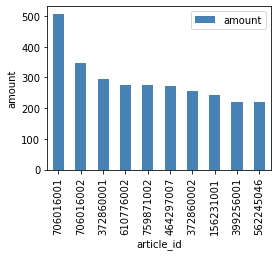

In [57]:
fig = plt.figure(figsize=(4, 3))
ax = fig.gca()
TOP_products_amount_with_names[:10].plot.bar(x= 'article_id', ax = ax, color='steelblue')
ax.set_ylabel('amount');

<div class="alert alert-block alert-warning">
Сравнение полученных данных ТОП-10 по выручке и ТОП-10 по количеству
</div>

In [58]:
TOP_products_price_with_names[:10]['article_id'] == TOP_products_amount_with_names[:10]['article_id']

0     True
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: article_id, dtype: bool

<div class="alert alert-block alert-success">
Первые две позиции совпали. Это значит, что самые популярные товары также дают самую высокую выручку
</div>

<div class="alert alert-block alert-warning">
<b>4.4 Определение доли товаров, которые были проданы один раз, построение круговой диаграммы</b>
</div>

In [59]:
once_products = TOP_products_amount_with_names.where(TOP_products_amount_with_names.amount == 1).dropna()
once_products

,article_id,amount,product_name,color
36885,857357002.0,1.0,Necklace,Gold
36886,594394002.0,1.0,Top,Dark Blue
36887,619229001.0,1.0,Slippers,Grey
36888,594541047.0,1.0,Trousers,Grey
36889,594542008.0,1.0,Hoodie,Dark Green
...,...,...,...,...
53175,799660001.0,1.0,Hat/beanie,Red
53176,670316002.0,1.0,Necklace,Silver
53177,799681001.0,1.0,Earring,Gold
53178,799683001.0,1.0,Ring,Gold


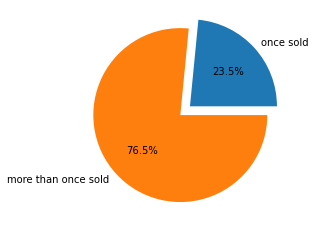

In [60]:
piece_of_pie1 = once_products['article_id'].count()
piece_of_pie2 = TOP_products_amount_with_names['article_id'].count()
full_pie = [piece_of_pie1, piece_of_pie2]
label = ['once sold','more than once sold']
plt.pie(full_pie, autopct='%.1f%%', labels=label, explode = (0.15,0))
plt.show()

<div class="alert alert-block alert-success">
<b>23,5% товаров проданы всего однажды</b>
</div>

<div class="alert alert-block alert-warning">
<b>4.5 Определение возрастной группы, покупающей больше товаров. Формирование групп с шагом 10 лет. Построение столбчатой диаграммы и графика плотности распределения</b>
</div>

In [61]:
df_age_group = df_transactions_cleaned.merge(right= df_customers_cleaned, right_on= 'customer_id', left_on= 'customer_id')
df_age_group

,t_dat,article_id,price,customer_id,month,club_member,fashion_news,age
0,2018-09-21,493810014,19.05,1,9,ACTIVE,Regularly,24.0
1,2018-10-04,594541012,16.93,2,10,ACTIVE,Monthly,45.0
2,2018-12-11,719712001,36.00,3,12,ACTIVE,NONE,48.0
3,2019-04-08,700737007,25.41,4,4,ACTIVE,Regularly,23.0
4,2020-07-23,864513001,22.02,4,7,ACTIVE,Regularly,23.0
...,...,...,...,...,...,...,...,...
313451,2018-09-27,636323001,16.93,229799,9,ACTIVE,NONE,27.0
313452,2018-11-23,657795001,40.66,229800,11,ACTIVE,NONE,48.0
313453,2019-07-10,636323001,16.93,229801,7,ACTIVE,Regularly,23.0
313454,2019-01-20,589924010,10.15,229802,1,ACTIVE,Regularly,21.0


In [62]:
df_age_group['age_group'] = pd.cut(df_age_group['age'], bins=[x for x in range(10,100,10)], labels=['20-','21-30','31-40','41-50','51-60','61-70','71-80','81+'])

<div class="alert alert-block alert-warning">
<b>Проверка правильности распределения возрастных групп</b>
</div>

In [63]:
df_age_group[df_age_group['age'] == 19]

,t_dat,article_id,price,customer_id,month,club_member,fashion_news,age,age_group
15,2020-09-03,875094002,19.44,12,9,ACTIVE,NONE,19.0,20-
67,2019-02-01,616088013,6.76,39,2,ACTIVE,Regularly,19.0,20-
103,2020-07-24,832453002,16.93,59,7,ACTIVE,NONE,19.0,20-
161,2019-09-05,677930066,16.93,87,9,ACTIVE,Regularly,19.0,20-
204,2019-07-22,325087002,13.54,112,7,ACTIVE,Regularly,19.0,20-
...,...,...,...,...,...,...,...,...,...
313343,2019-10-21,761221008,42.36,229688,10,ACTIVE,Regularly,19.0,20-
313344,2020-06-10,832036005,16.93,229689,6,ACTIVE,NONE,19.0,20-
313395,2020-04-24,714790021,50.83,229742,4,ACTIVE,NONE,19.0,20-
313426,2020-06-04,804811001,42.36,229773,6,ACTIVE,Regularly,19.0,20-


<div class="alert alert-block alert-success">
<b>Возрастные группы присвоены верно, границы групп включены в эти же группы</b>
</div>

<div class="alert alert-block alert-warning">
<b>Подсчет купленных товаров каждой возрастной категорией</b>
</div>

In [64]:
TOP_age_group_amount = df_age_group.groupby(['age_group']).count()['price'].reset_index().sort_values(['price'], ascending= False)
TOP_age_group_amount.rename(columns= {'price': 'amount'}, inplace= True)
TOP_age_group_amount[:10]

,age_group,amount
1,21-30,133246
2,31-40,55966
3,41-50,51797
4,51-60,46241
0,20-,14516
5,61-70,9961
6,71-80,1680
7,81+,49


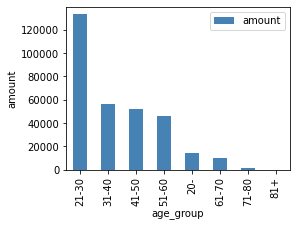

In [65]:
fig = plt.figure(figsize=(4, 3))
ax = fig.gca()
TOP_age_group_amount[:10].plot.bar(x= 'age_group', ax = ax, color='steelblue')
ax.set_ylabel('amount');

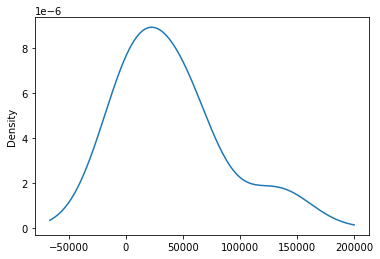

In [66]:
TOP_age_group_amount[:10]['amount'].plot(kind='density');

<div class="alert alert-block alert-success">
<b>Больше всего товаров покупает возрастная группа от 21 до 30 лет включительно</b>
</div>

<div class="alert alert-block alert-warning">
<b>4.6 Определение зависимости покупки товаров от активности слежения за новостями о моде, построение стобчатой диаграммы</b>
</div>

In [67]:
TOP_fashion_amount = df_age_group.groupby(['fashion_news']).count()['price'].reset_index().sort_values(['price'], ascending= False)
TOP_fashion_amount.rename(columns= {'price': 'amount'}, inplace= True)
TOP_fashion_amount[:10]

,fashion_news,amount
1,NONE,178786
2,Regularly,134571
0,Monthly,99


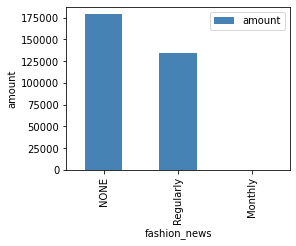

In [68]:
fig = plt.figure(figsize=(4, 3))
ax = fig.gca()
TOP_fashion_amount[:10].plot.bar(x= 'fashion_news', ax = ax, color='steelblue')
ax.set_ylabel('amount');

<div class="alert alert-block alert-success">
<b>Те, кто активно следит за новостями моды, покупают товаров меньше тех, кто ими не интересуется вовсе</b>
</div>

## Выводы раздела 2

$\blacktriangleright$ Произведен разведочный анализ данных

$\blacktriangleright$ Определено количество проданных товаров по месяцам

$\blacktriangleright$ Выявлены товары с максимально выручкой за все время

$\blacktriangleright$ Определены самые популярные товары по количеству за все время

$\blacktriangleright$ Определена доля товаров, купленных всего однажды

$\blacktriangleright$ Определена возрастная категория, купившая больше всего товаров

$\blacktriangleright$ Проверено наличие зависимости количества купленных товаров от слежения за новостями моды. Данная зависимость не прослеживается

### ----------

## Раздел 3 - Определение взаимосвязей признаков

* Шаг 5. Анализ взаимосвязи признаков
    1. Проверить гипотезу о данных - влияет ли статус членства клуба на количество купленных товаров, найти p-value, сформулировать вывод
* Шаг 6. Кластеризация по покупателям
    1. Сформировать датасет с признаками *покупатель, количество купленных товаров, возраст, итоговая потраченная сумма, членство в клубе, частота просмотра новостей*
    1. Найти оптимальное количество кластеров по покупателям
    1. Построить модель кластеризации данных
    1. Визуализировать кластеры с помощью диаграммы рассеивания, выбрать подходящие признаки для диаграммы

<div class="alert alert-block alert-warning">
<b>5.1 Анализ влияния членства в клубе на количество купленных товаров</b>
</div>

<div class="alert alert-block alert-warning">
<b>Формирование датасета для анализа: добавление нужных признаков, объединение таблиц</b>
</div>

In [69]:
temp_df = df_transactions_cleaned.groupby(['customer_id']).count()['price'].reset_index()
temp_df.rename(columns= {'price': 'amount'}, inplace= True)
temp_df

,customer_id,amount
0,0,2
1,1,1
2,2,1
3,3,1
4,4,2
...,...,...
229156,229799,1
229157,229800,1
229158,229801,1
229159,229802,1


In [70]:
df_membership_qnty = df_customers_cleaned.merge(right= temp_df, right_on= 'customer_id', left_on= 'customer_id')
df_membership_qnty.sort_values('amount', ascending= False)

,club_member,fashion_news,age,customer_id,amount
147368,ACTIVE,Regularly,61.0,23883,20
16901,ACTIVE,Regularly,54.0,7232,19
168377,ACTIVE,NONE,31.0,2458,19
205046,ACTIVE,NONE,46.0,34469,16
181610,ACTIVE,Regularly,68.0,52416,16
...,...,...,...,...,...
86595,ACTIVE,NONE,24.0,22516,1
86597,ACTIVE,Regularly,47.0,69254,1
86598,ACTIVE,Regularly,21.0,203547,1
86599,ACTIVE,NONE,63.0,113592,1


In [71]:
df_membership_qnty['club_member'] = df_membership_qnty['club_member'].replace({'ACTIVE':2, 'PRE-CREATE':1, 'LEFT CLUB':0})
df_membership_qnty.sort_values('amount', ascending= False)

,club_member,fashion_news,age,customer_id,amount
147368,2,Regularly,61.0,23883,20
16901,2,Regularly,54.0,7232,19
168377,2,NONE,31.0,2458,19
205046,2,NONE,46.0,34469,16
181610,2,Regularly,68.0,52416,16
...,...,...,...,...,...
86595,2,NONE,24.0,22516,1
86597,2,Regularly,47.0,69254,1
86598,2,Regularly,21.0,203547,1
86599,2,NONE,63.0,113592,1


<div class="alert alert-block alert-success">
<b>Датасет для анализа сформирован успешно</b>
</div>

<div class="alert alert-block alert-warning">
<b>Выдвижение нулевой гипотезы: признаки club_member (членство в клубе) и amount (количество купленных товаров) статистически независимы</b>
</div>

<div class="alert alert-block alert-warning">
<b>Импорт библиотеки для нахождения p-значения связи между категориальным признаком членства в клубе и количественным признаком количества купленных товаров</b>
</div>

In [72]:
from scipy.stats import pointbiserialr
pointbiserialr(df_membership_qnty['club_member'], df_membership_qnty['amount'])

PointbiserialrResult(correlation=0.05147910712270094, pvalue=1.0198545924687084e-132)

<div class="alert alert-block alert-success">
<b>Значение p стремиться к нулю, что позволяет отвергнуть нулевую гипотезу о независимости переменных. Можно говорить о зависимости количества купленных товаров от членства в клубе</b>
</div>

<div class="alert alert-block alert-warning">
<b>6 Кластеризация по покупателям</b>
</div>

<div class="alert alert-block alert-warning">
<b>6.1 Формирование датасета с признаками покупатель, количество купленных товаров, возраст, итоговая потраченная сумма, членство в клубе, частота просмотра новостей</b>
</div>

In [73]:
temp_df_cl = df_transactions_cleaned[['customer_id', 'price']].groupby(['customer_id']).sum()['price'].reset_index()
temp_df_cl.rename(columns= {'price': 'paid_sum'}, inplace= True)
temp_df_cl

,customer_id,paid_sum
0,0,50.81
1,1,19.05
2,2,16.93
3,3,36.00
4,4,47.43
...,...,...
229156,229799,16.93
229157,229800,40.66
229158,229801,16.93
229159,229802,10.15


In [74]:
df_customers_expanded = df_membership_qnty.merge(right= temp_df_cl, right_on= 'customer_id', left_on= 'customer_id') #, how= 'outer'
df_customers_expanded['fashion_news'] = df_customers_expanded['fashion_news'].replace({'NONE':0, 'Regularly':2, 'Monthly':1})
df_customers_expanded.sort_values('amount', ascending= False)

,club_member,fashion_news,age,customer_id,amount,paid_sum
147368,2,2,61.0,23883,20,767.63
16901,2,2,54.0,7232,19,610.12
168377,2,0,31.0,2458,19,662.06
205046,2,0,46.0,34469,16,429.64
181610,2,2,68.0,52416,16,562.86
...,...,...,...,...,...,...
86595,2,0,24.0,22516,1,16.93
86597,2,2,47.0,69254,1,15.24
86598,2,2,21.0,203547,1,22.86
86599,2,0,63.0,113592,1,13.54


In [75]:
df_customers_expanded

,club_member,fashion_news,age,customer_id,amount,paid_sum
0,2,0,49.0,91991,1,11.51
1,2,2,32.0,164401,1,13.71
2,2,2,56.0,182738,2,60.13
3,2,2,30.0,166422,1,25.41
4,1,2,40.0,164557,1,13.54
...,...,...,...,...,...,...
226477,2,2,44.0,96272,1,25.41
226478,2,0,27.0,14468,1,67.78
226479,2,0,27.0,76150,2,67.76
226480,2,0,40.0,94386,1,8.46


In [76]:
df_customers_expanded.loc[df_customers_expanded['paid_sum'] <10]

,club_member,fashion_news,age,customer_id,amount,paid_sum
27,2,0,22.0,204345,1,6.76
40,2,0,19.0,118565,1,5.07
48,2,2,52.0,206257,1,5.66
54,2,2,42.0,165272,1,5.07
61,2,0,53.0,167858,1,5.07
...,...,...,...,...,...,...
226447,2,0,22.0,97696,1,8.12
226449,2,0,39.0,29768,1,9.83
226451,2,0,49.0,26063,1,6.76
226468,2,2,52.0,191101,1,5.07


<div class="alert alert-block alert-success">
<b>Датасет сформирован успешно</b>
</div>

<div class="alert alert-block alert-warning">
<b>6.2 Определение оптимально минимального количества кластеров по методу локтя</b>
</div>

<div class="alert alert-block alert-warning">
<b>Загрузка библиотек, определение суммы квадратических отклонений для каждого значения количества кластеров по методу k-средних</b>
</div>

In [77]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_customers_expanded)
    Sum_of_squared_distances.append(km.inertia_)

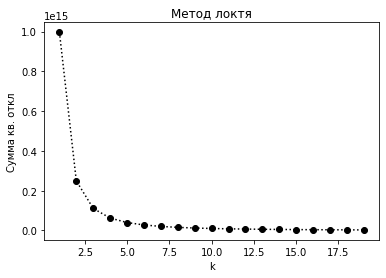

In [78]:
plt.plot(K, Sum_of_squared_distances, 'ko:')
plt.xlabel('k')
plt.ylabel('Сумма кв. откл')
plt.title('Метод локтя')
plt.show()

<div class="alert alert-block alert-success">
<b>Оптимальное количество кластеров равно 4, т.к. уменьшение квадратического отклонения после 4 значительно замедляется и большее количество кластеров не улучшит качество разделения на группы, а только усложнит дальнейшую работу с кластерами</b>
</div>

<div class="alert alert-block alert-warning">
<b>6.3 Разбиение значений датасета на кластеры по методу k-средних</b>
</div>

In [79]:
df_customers_expanded.columns

Index(['club_member', 'fashion_news', 'age', 'customer_id', 'amount',
       'paid_sum'],
      dtype='object')

In [80]:
kmeans = KMeans(n_clusters = 4, random_state=0).fit(df_customers_expanded[['club_member','fashion_news','age','amount','paid_sum']])

predict = kmeans.predict(df_customers_expanded[['club_member','fashion_news','age','amount','paid_sum']])
df_customers_expanded['cluster'] = predict
df_customers_expanded

,club_member,fashion_news,age,customer_id,amount,paid_sum,cluster
0,2,0,49.0,91991,1,11.51,0
1,2,2,32.0,164401,1,13.71,3
2,2,2,56.0,182738,2,60.13,1
3,2,2,30.0,166422,1,25.41,3
4,1,2,40.0,164557,1,13.54,0
...,...,...,...,...,...,...,...
226477,2,2,44.0,96272,1,25.41,0
226478,2,0,27.0,14468,1,67.78,1
226479,2,0,27.0,76150,2,67.76,1
226480,2,0,40.0,94386,1,8.46,3


<div class="alert alert-block alert-warning">
<b>6.4 Визуализация кластеров на диаграмме рассеивания</b>
</div>

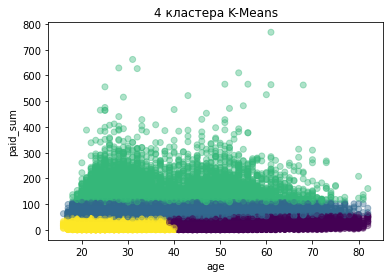

In [81]:
prop1 = 'age'
prop2 = 'paid_sum'
plt.scatter(df_customers_expanded[prop1], df_customers_expanded[prop2], c = df_customers_expanded['cluster'], cmap='viridis', alpha = 0.4)
plt.xlabel(prop1)
plt.ylabel(prop2)
# plt.xlim(0, 400)
# plt.ylim(0, 3e6)
plt.title('4 кластерa K-Means')
plt.show()

<div class="alert alert-block alert-success">
<b>Разделение на кластеры произошло успешно. Выделено 4 кластера:
    1. до 40 лет, покупающие мало
    2. старше 40 лет, покупающие мало
    3. всех возрастов, покупающие на среднем уровне
    4. всех возрастов, покупающие много</b>
</div>

## Выводы раздела 3

$\blacktriangleright$ Выявлена зависимость признака количество купленных товаров от членства в клубе

$\blacktriangleright$ Определены кластеры покупателей

### ----------

## Раздел 4 - Построение рекомендательной системы

* Шаг 7. Построение рекомендательной системы 
    1. Сформировать датасет с признаками *покупатель, товар, количество купленных товаров*
    1. Выполнить коллаборативную фильтрацию по схожести покупателей
    1. Вывести в качестве рекомендаций список наименований товаров для пользователя с ИД = 6510

<div class="alert alert-block alert-warning">
<b>7.1 Импорт библиотек, формирование датасета для построения рекомендательной системы</b>
</div>

<div class="alert alert-block alert-warning">
<b>Загрузка библиотек для создания векторов данных с целью дальнейшего сравнения полученных векторов и определения наиболее подходящих продуктов для рекомендации другим пользователям</b>
</div>

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.neighbors import NearestNeighbors

from scipy.sparse import csr_matrix

from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-warning">
<b>Создание датасета с нужными признаками: пользователи, продукты, количество купленного продукта пользователем</b>
</div>

In [83]:
df_temp_recomend = df_transactions_cleaned.groupby(['article_id','customer_id']).count()['price'].reset_index().sort_values(['customer_id'], ascending= True)
df_temp_recomend.rename(columns= {'price': 'amount'}, inplace= True)
df_temp_recomend.sort_values('customer_id', inplace= True)
df_temp_recomend

,article_id,customer_id,amount
259005,812376001,0,1
147076,706016003,0,1
21482,493810014,1,1
58973,594541012,2,1
166952,719712001,3,1
...,...,...,...
82381,636323001,229799,1
94067,657795001,229800,1
82382,636323001,229801,1
57357,589924010,229802,1


<div class="alert alert-block alert-success">
<b>Датасет сформирован успешно</b>
</div>

<div class="alert alert-block alert-warning">
Проверка правильности построения датасета на условно-случайном пользователе
</div>

In [84]:
df_temp_recomend.loc[df_temp_recomend['customer_id'] == 6510]

,article_id,customer_id,amount
305338,880792001,6510,1
288871,853931002,6510,1
168300,720572002,6510,1
311706,903306003,6510,1
167924,720202001,6510,1


<div class="alert alert-block alert-warning">
Проверка датасета на наличие аномалий
</div>

In [85]:
df_temp_recomend.describe()

,article_id,customer_id,amount
count,3.158750e+05,315875.000000,315875.000000
mean,6.957110e+08,103068.700068,1.002340
std,1.338289e+08,65779.073972,0.049414
min,1.087750e+08,0.000000,1.000000
25%,6.314920e+08,45427.500000,1.000000
50%,7.139970e+08,97351.000000,1.000000
75%,7.863360e+08,157732.500000,1.000000
max,9.534500e+08,229803.000000,5.000000


<div class="alert alert-block alert-success">
Сформированный датасет не содержит аномалий
</div>

<div class="alert alert-block alert-warning">
<b>Создание матрицы значений: названия строк - пользователи, названия столбцов - продукты, на пересечении - количество купленного продукта пользователем. Также требуется заполнить пустые ячейки значением 0 для возможности обучения модели</b>
</div>

In [86]:
df_matrix = df_temp_recomend[:15000].pivot(index='customer_id', columns='article_id', values='amount').fillna(0)

In [87]:
df_matrix

article_id,108775015,108775044,110065002,111586001,111593001,111609001,120129001,120129014,123173001,129085001,...,934536001,934727001,936217001,936622001,937466001,938804001,941005003,942596001,946282001,949551002
customer_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
w1_pivot_matrix = csr_matrix(df_matrix)

<div class="alert alert-block alert-warning">
<b>Обучение модели ближайших соседей на основе созданной матрицы значений</b>
</div>

In [89]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(w1_pivot_matrix)

<div class="alert alert-block alert-warning">
<b>Определение функции для определения наиболее близких пользователей, проверка на случайном пользователе</b>
</div>

In [90]:
def most_similar_users_to(user_id, n_items=10):
    most_similar_users_to = []
    distance, indice = model_knn.kneighbors(df_matrix.iloc[df_matrix.index[user_id],:].values.reshape(1,-1), n_neighbors=n_items)
    for i in range(1, len(distance.flatten())):
        user_id1 = df_matrix.index[indice.flatten()[i]]
        most_similar_users_to.append((user_id1, distance.flatten()[i]))

    most_similar_users_to.sort(key=lambda x: x[1], reverse=True)
    print('Рекомендации для ## {0} ##:'.format(user_id))

    return most_similar_users_to[:n_items]

In [91]:
most_similar_users_to(6510)

Рекомендации для ## 6510 ##:


[(5383, 1.0),
 (5385, 1.0),
 (5381, 1.0),
 (5382, 1.0),
 (5390, 1.0),
 (4939, 0.8259223440443022),
 (7814, 0.7642977396044841),
 (5108, 0.591751709536137),
 (273, 0.591751709536137)]

<div class="alert alert-block alert-warning">
<b>7.2 Определение функции рекомендаций на основе пользователя (по наиболее похожему пользователю)</b>
</div>

In [92]:
def user_based_suggestions(user_id, n_items=10):
    # суммировать все коэффициенты подобия
    suggestions = defaultdict(float)
# Создаем контейнер для рекомендаций
    non_interacted_items = df_matrix.iloc[user_id][df_matrix.iloc[user_id]==0].index.tolist()
# Определяем позиции (фильмы, продукты и т.п.), которые не влияют на выбор, т.к. они равны 0 для выбранного пользователя.
# Т.е. данные позиции выбранный пользователь еще не покупал, не смотрел и т.п. Именно их будет рекомендовать система
    
    for other_user_id, similarity in most_similar_users_to(user_id):
# Для пользователей в списке наиболее близких пользователей
        items_user_id = df_matrix.loc[other_user_id][df_matrix.loc[other_user_id]>0]
# Выбрать номера продуктов с продажами >0
        for interest in items_user_id.index.tolist(): # Для каждого продукта из списка
            if interest in non_interacted_items: # Если номер продукта в списке не купленных продуктов
                suggestions[df_product[df_product['article_id']==interest]['product_name'].values[0], interest] += similarity
# тогда в контейнер для рекомендаций добавить номер продукта и присвоить ему значение "похожести",
# каждый раз увеличивая его на "похожесть" других пользователей, купивших этот продукт

    # преобразовать их в сортированный список
    suggestions = sorted(suggestions.items(),
                         key=lambda x: x[1],
                         reverse=True)
    return suggestions[:n_items]

<div class="alert alert-block alert-warning">
<b>7.3 Вывод рекомендаций для заданного пользователя</b>
</div>

In [93]:
user_based_suggestions(6510)

Рекомендации для ## 6510 ##:


[(('Bikini top', 758064001), 2.009425763116576),
 (('Trousers', 573716028), 1.0),
 (('Trousers', 714790020), 1.0),
 (('Sweater', 821031002), 1.0),
 (('Bikini top', 822946001), 1.0),
 (('Skirt', 872834001), 1.0),
 (('Bra', 429313008), 1.0),
 (('T-shirt', 763275014), 1.0),
 (('Blazer', 636455003), 1.0),
 (('Top', 659832009), 1.0)]

<div class="alert alert-block alert-success">
<b>Итогом выполнения функции рекомендаций для пользователя с id=6510 является список id продуктов с их коэффициентами подобия. Например, продукт с 758064001 может быть куплен пользователем 6510 с максимальной вероятностью для представленного набора данных</b>
</div>

## Выводы раздела 4

$\blacktriangleright$ Рекомендательная система на основе схожести пользователей построена

$\blacktriangleright$ Даны рекомендации по товарам для пользователя 6510

### ----------